In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

def obter_interfmodel(item):
    interfModel = item[12]
    return interfModel

def obter_node(item):
    node = item[19]
    return node

In [3]:
# arquivo de interesse
FILE = 'packet_breakdown.txt' 
colunas = ['InterfModel,node',
           'Failed, buffer overflow',
           'Failed, busy channel',
           'Failed, no ack',
           'Success, first try',
           'Success, not first try']

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

# Data Frame com todos os dados.
DATA = pd.DataFrame()

# captura dos dados 
for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['Modelo de Colisao'] = dfPRR['InterfModel,node'].apply(obter_interfmodel)
        dfPRR['node'] = dfPRR['InterfModel,node'].apply(obter_node)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [4]:
col = ['Failed, buffer overflow',
       'Failed, busy channel',
       'Failed, no ack',
       'Success, first try',
       'Success, not first try']

DATA['total packets'] = DATA[col].sum(axis=1)
DATA['buffer overflow rate'] = DATA['Failed, buffer overflow'] / DATA['total packets']
DATA['busy channel rate'] = DATA['Failed, busy channel'] / DATA['total packets']
DATA['no ack rate'] = DATA['Failed, no ack'] / DATA['total packets']

DATA['sucess rate, first try'] = DATA['Success, first try'] / DATA['total packets']
DATA['sucess rate, not first try'] = DATA['Success, not first try'] / DATA['total packets']

In [5]:
DATA.sample(5)

,"InterfModel,node","Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",Modelo de Colisao,node,simulacao,total packets,buffer overflow rate,busy channel rate,no ack rate,"sucess rate, first try","sucess rate, not first try"
6,"InterfModel=1,node=2",0.00,105.57,170.59,2109.55,612.12,1,2,PA,2997.83,0.000000,0.035215,0.056904,0.703692,0.204188
86,"InterfModel=2,node=2",0.00,21.04,22.77,2333.55,620.47,2,2,p=0.4,2997.83,0.000000,0.007018,0.007595,0.778413,0.206973
52,"InterfModel=1,node=3",641.90,17.59,641.87,2131.56,1036.66,1,3,p=0.2,4469.58,0.143615,0.003935,0.143609,0.476904,0.231937
22,"InterfModel=1,node=3",701.45,49.67,1554.50,1696.06,461.49,1,3,PB,4463.17,0.157164,0.011129,0.348295,0.380012,0.103400
46,"InterfModel=0,node=2",0.00,19.44,48.94,2137.12,792.33,0,2,p=0.2,2997.83,0.000000,0.006485,0.016325,0.712889,0.264301


In [6]:
DATA.dtypes

InterfModel,node               object
Failed, buffer overflow       float64
Failed, busy channel          float64
Failed, no ack                float64
Success, first try            float64
Success, not first try        float64
Modelo de Colisao              object
node                           object
simulacao                      object
total packets                 float64
buffer overflow rate          float64
busy channel rate             float64
no ack rate                   float64
sucess rate, first try        float64
sucess rate, not first try    float64
dtype: object

In [7]:
colorMAP = {
    'PA' : '#FF7F0E',
    'PB' : '#2CA02C',
    'p=0.1' : '#1F77B4',
    'p=0.2' : '#1F77B4',
    'p=0.3' : '#1F77B4',
    'p=0.4' : '#1F77B4',
    'p=0.5' : '#1F77B4',
    'p=0.6' : '#1F77B4',
    'p=0.7' : '#1F77B4',
    'p=0.8' : '#1F77B4',
    'p=0.9' : '#1F77B4'
}

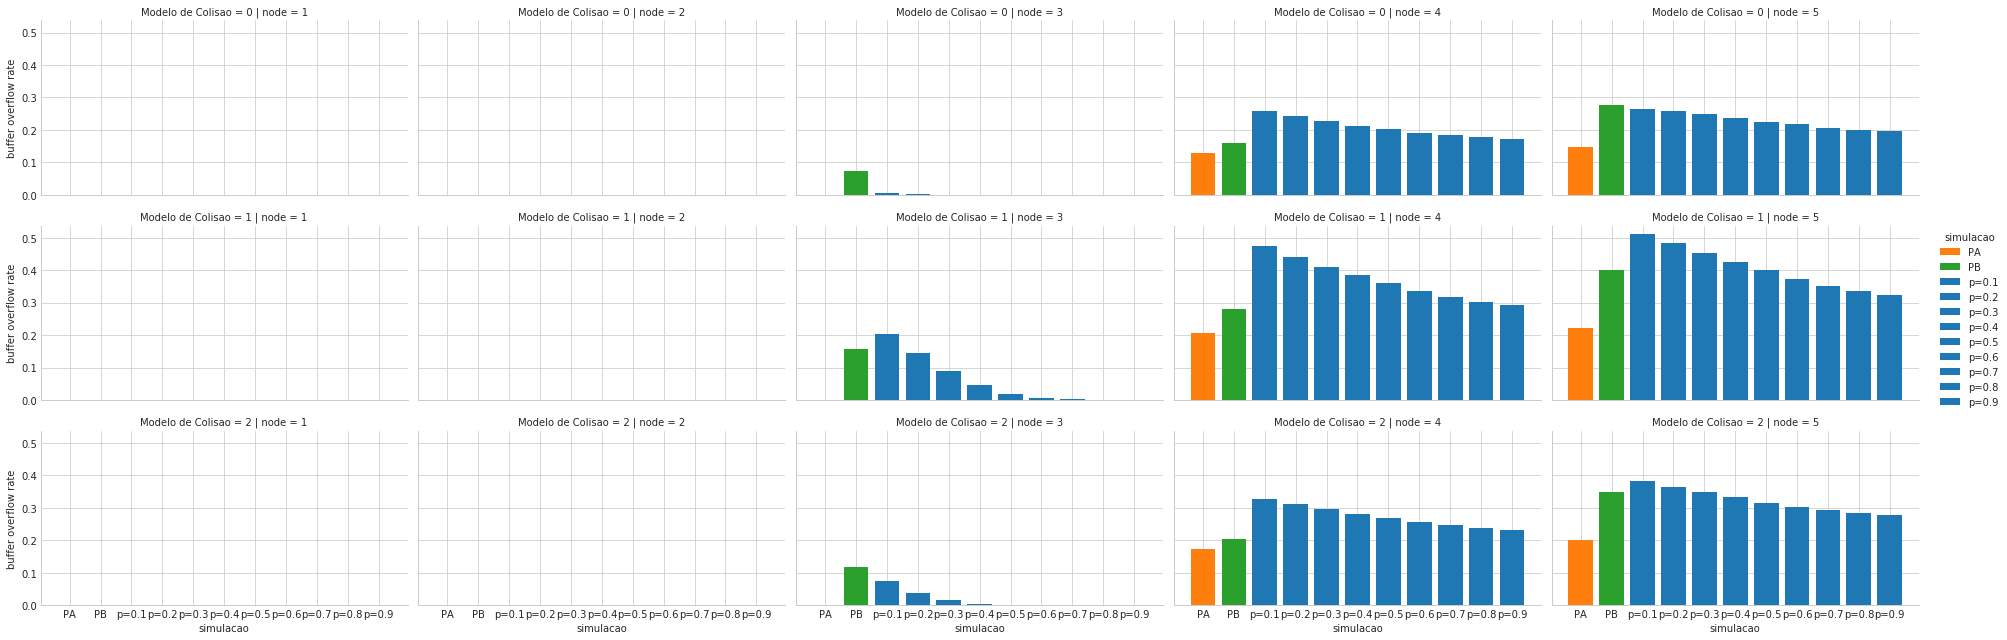

In [8]:
df = DATA

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=True,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()

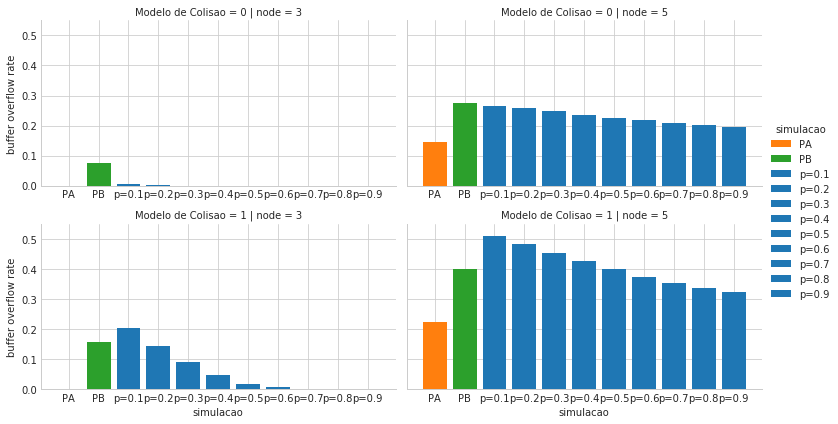

In [9]:

select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
# select = (DATA['InterfModel'] != '2')
# select = (DATA['InterfModel'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['simulacao'] != 'PA') & (DATA['simulacao'] != 'PB')
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()
grid.set(ylim=(0,0.55))

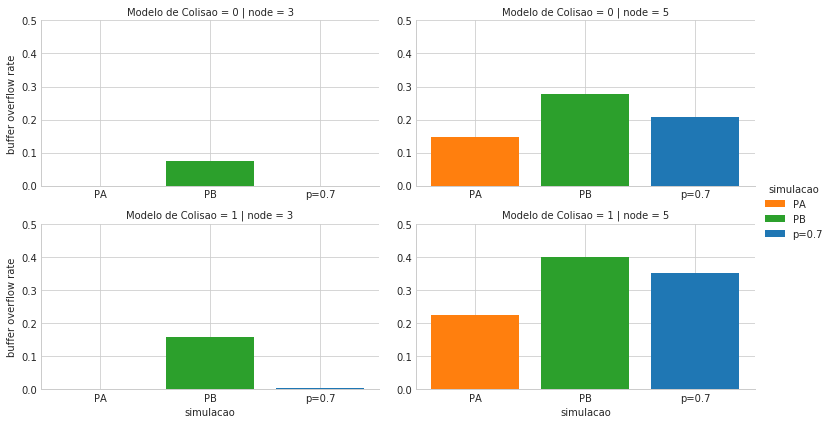

In [10]:

select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
# select = (DATA['InterfModel'] != '2')
# select = (DATA['InterfModel'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['simulacao'] != 'PA') & (DATA['simulacao'] != 'PB')
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()

# 
grid.set(ylim=(0,0.5))

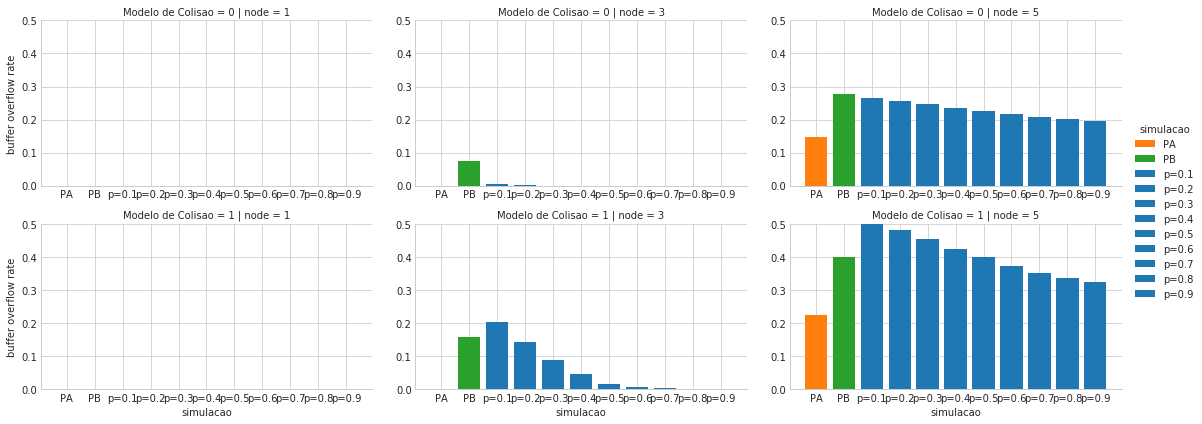

In [11]:
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
# select = (DATA['InterfModel'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['simulacao'] != 'PA') & (DATA['simulacao'] != 'PB')
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()
grid.set(ylim=(0,0.5))

In [12]:
# select = (DATA['InterfModel'] != '2')
# df = DATA[select]

# grid = sns.FacetGrid(df,
#                      col="InterfModel",
#                      palette='tab10_r',
#                      legend_out=True,
#                      sharex=False,
#                      sharey=True,
#                      aspect=1.8
#                     )

# grid.map(plt.bar,'simulacao','buffer overflow rate')
# grid.add_legend()

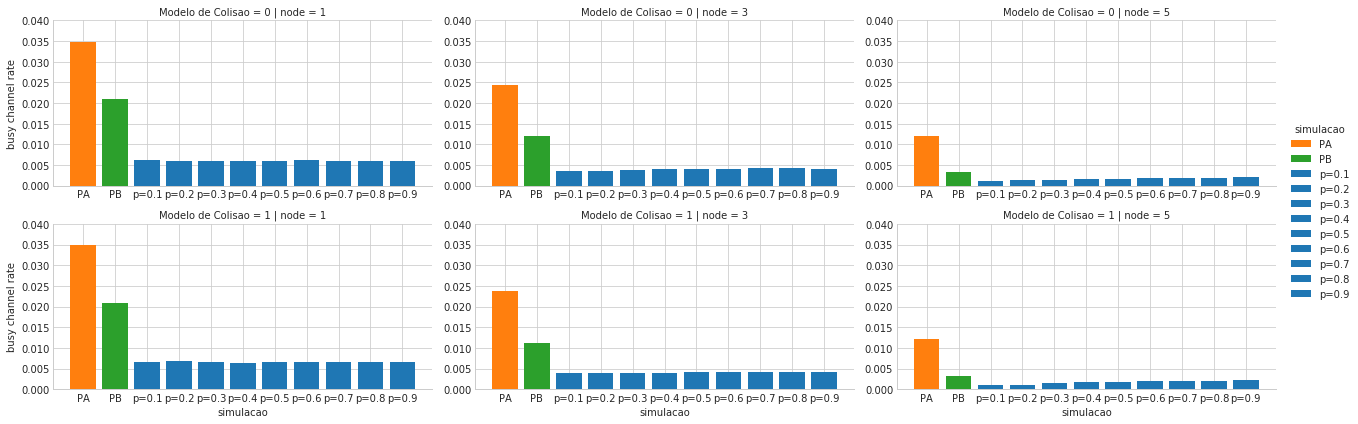

In [13]:
## Gráfico Busy channel Rate
# select = (DATA['InterfModel'] != '2' )
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','busy channel rate')
grid.add_legend()
grid.set(ylim=(0,0.04))

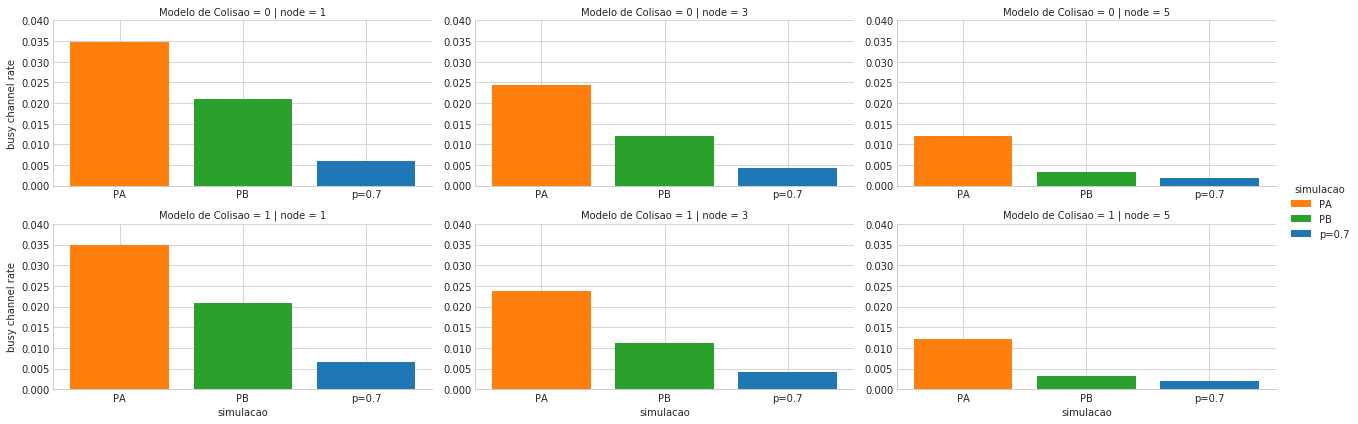

In [14]:
## Gráfico Busy channel Rate
# select = (DATA['InterfModel'] != '2' )
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','busy channel rate')
grid.add_legend()
grid.set(ylim=(0,0.04))

In [15]:
# select = (DATA['InterfModel'] != '2')
# df = DATA[select]

# grid = sns.FacetGrid(df,
#                      col="InterfModel",
#                      palette='tab10_r',
#                      legend_out=True,
#                      sharex=False,
#                      sharey=True,
#                      aspect=1.8
#                     )

# grid.map(plt.bar,'simulacao','busy channel rate')
# grid.add_legend()

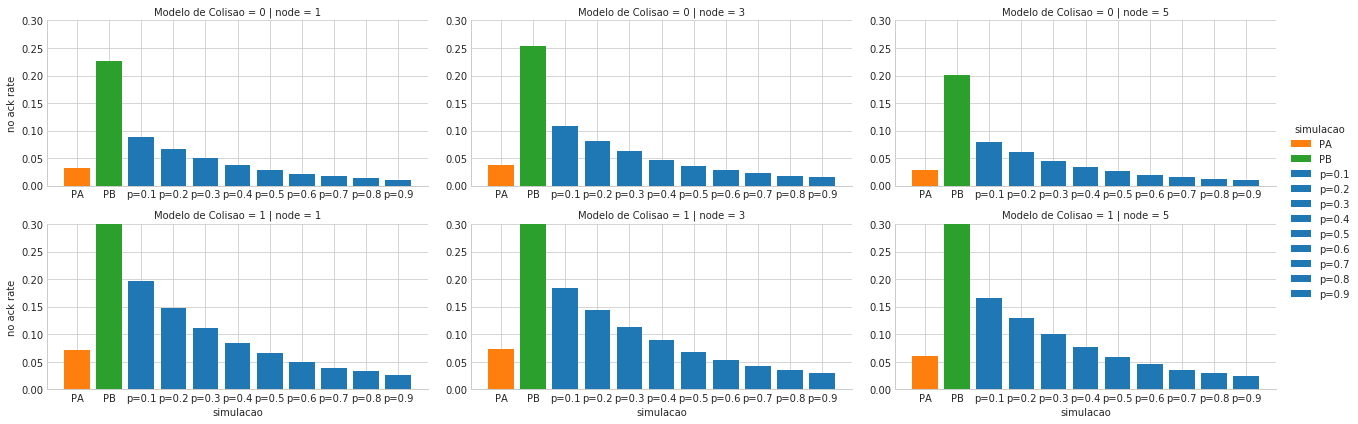

In [16]:
# select = (DATA['InterfModel'] != '2')
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]
# df = DATA

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue="simulacao",
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','no ack rate')
grid.add_legend()
grid.set(ylim=(0,0.3))

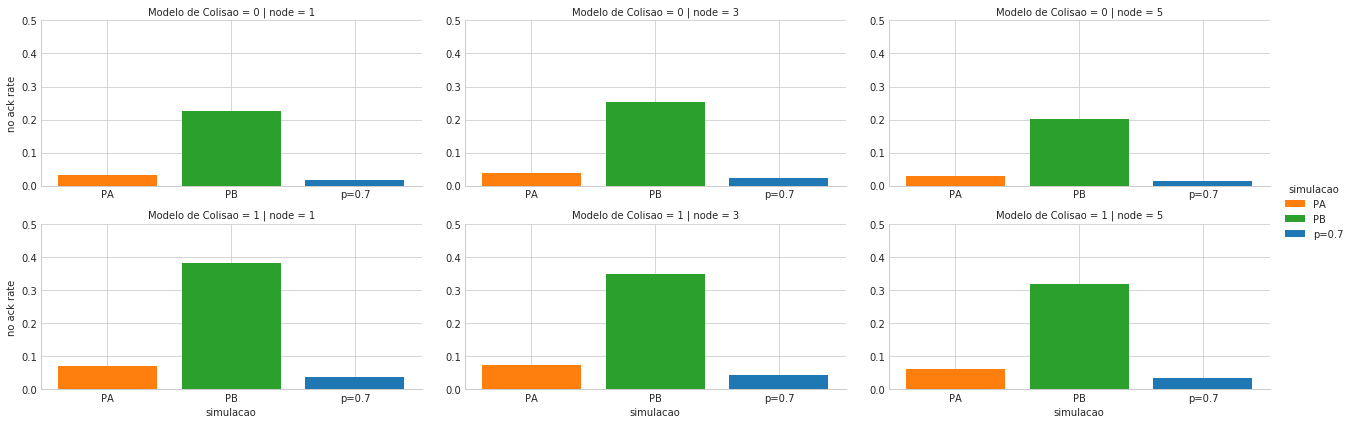

In [17]:
# select = (DATA['InterfModel'] != '2')
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue="simulacao",
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','no ack rate')
grid.add_legend()
grid.set(ylim=(0,0.5))

In [18]:
# select = (DATA['InterfModel'] != '2')
# df = DATA[select]

# grid = sns.FacetGrid(df,
#                      col="InterfModel",
#                      palette='tab10_r',
#                      legend_out=True,
#                      sharex=False,
#                      sharey=True,
#                      aspect=1.8
#                     )

# grid.map(plt.bar,'simulacao','no ack rate')
# grid.add_legend()

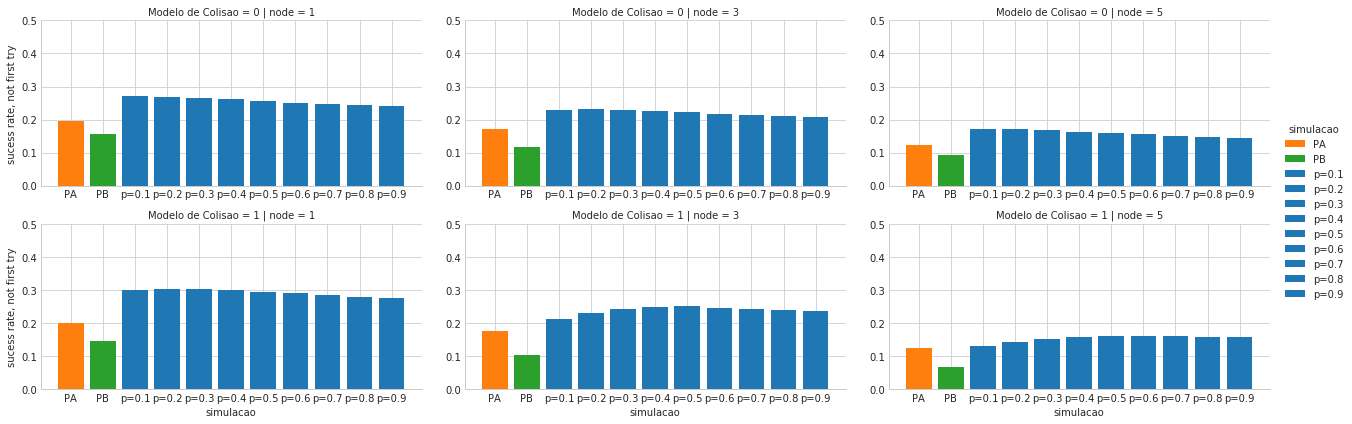

In [19]:
# select = (DATA['InterfModel'] != '2')
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]
#df = DATA

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','sucess rate, not first try')
grid.add_legend()
grid.set(ylim=(0,0.5))

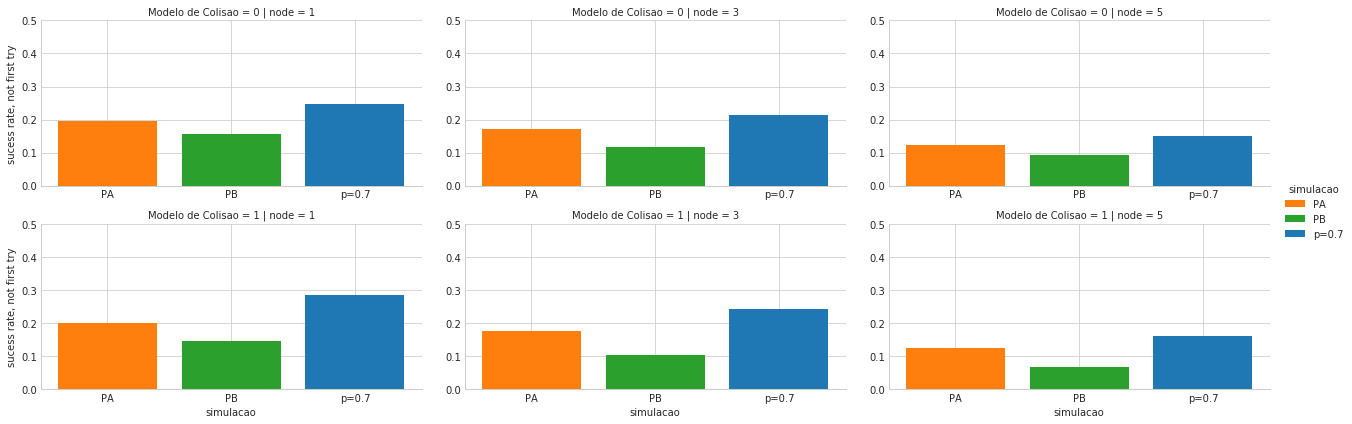

In [20]:
# select = (DATA['InterfModel'] != '2')
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','sucess rate, not first try')
grid.add_legend()
grid.set(ylim=(0,0.5))

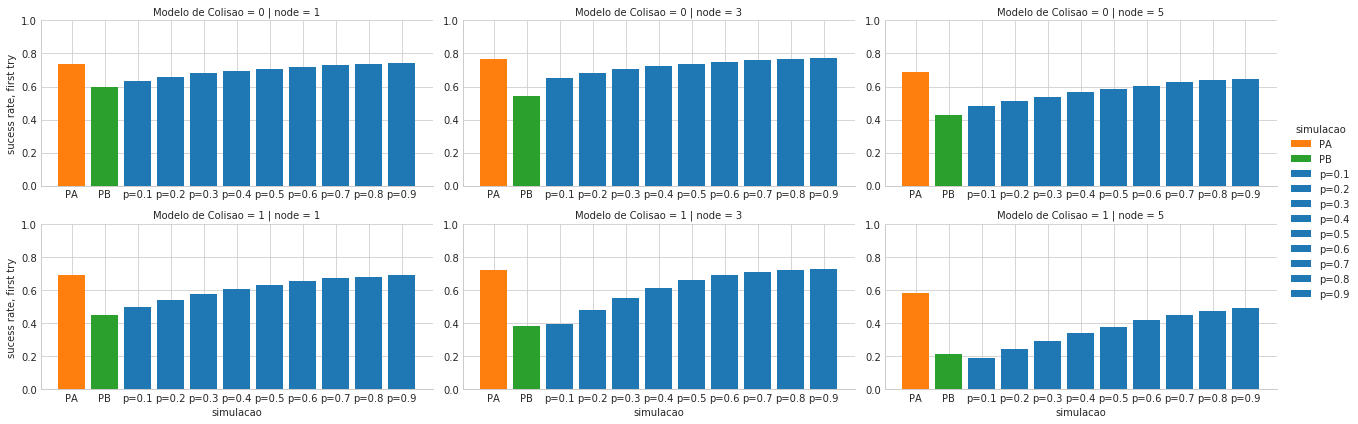

In [21]:
# select = (DATA['InterfModel'] != '2')
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]
# df = DATA

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','sucess rate, first try')
grid.add_legend()
grid.set(ylim=(0,1))

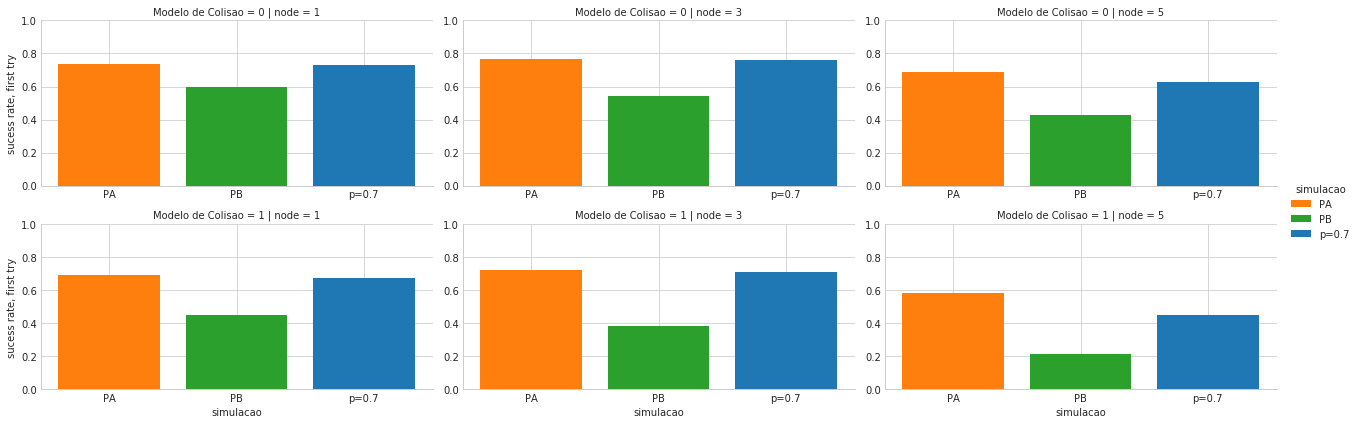

In [22]:
select = (DATA['Modelo de Colisao'] != '2') & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select]

grid = sns.FacetGrid(df,
                     row='Modelo de Colisao',
                     col="node",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','sucess rate, first try')
grid.add_legend()
grid.set(ylim=(0,1))

In [23]:
# select = (DATA['InterfModel'] != '2')
# df = DATA[select]

# grid = sns.FacetGrid(df,
#                      col="InterfModel",
#                      palette='Reds',
#                      legend_out=True,
#                      sharex=False,
#                      sharey=True,
#                      aspect=1.8
#                     )

# grid.map(plt.bar,'simulacao','sucess rate, first try')
# grid.add_legend()# select = (DATA['InterfModel'] != '2')
# df = DATA[select]

# grid = sns.FacetGrid(df,
#                      col="InterfModel",
#                      palette='Reds',
#                      legend_out=True,
#                      sharex=False,
#                      sharey=True,
#                      aspect=1.8
#                     )

# grid.map(plt.bar,'simulacao','sucess rate, first try')
# grid.add_legend()

In [24]:
# select = (DATA['InterfModel'] != '2')
# df = DATA[select]

# grid = sns.FacetGrid(df,
#                      col="InterfModel",
#                      palette='Reds',
#                      legend_out=True,
#                      sharex=False,
#                      sharey=True,
#                      aspect=1.8
#                     )

# grid.map(plt.bar,'simulacao','sucess rate, not first try')
